In [22]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings('ignore')

from librosa import clicks
import qgrid

from scipy.io import wavfile
import scipy.fftpack as fftpack

import IPython.display as ipd

In [5]:
files_ballroom = sorted(os.listdir('../data/audio/'))
files_ballroom = [file[:-4] for file in files_ballroom] # delete file ending

# To DO: only wavs


files_smc = [file for file in sorted(os.listdir('../data/audio/')) if file.startswith("SMC")]
files_smc = [file[:-4] for file in files_smc] # delete file ending

In [26]:
data = pd.read_csv('../data/TestPandas.csv', index_col=0)

In [27]:
new_data = pd.DataFrame(columns=data.columns)
new_data['file'] = files_smc
new_data['data_set'] = 2
new_data['idx'] = np.arange(len(data),len(data)+len(files_smc))

data = data.append(new_data, ignore_index=True)

In [33]:
data.to_csv('../data/data.csv')

In [46]:
file = data['file'][ data['data_set'] == 2]

SMC_001
SMC_002
SMC_003
SMC_004
SMC_005
SMC_006
SMC_007
SMC_008
SMC_009
SMC_010
SMC_011
SMC_012
SMC_013
SMC_014
SMC_015
SMC_016
SMC_017
SMC_018
SMC_019
SMC_021
SMC_022
SMC_023
SMC_024
SMC_026
SMC_027
SMC_028
SMC_030
SMC_032
SMC_033
SMC_034
SMC_035
SMC_036
SMC_037
SMC_038
SMC_041
SMC_042
SMC_043
SMC_044
SMC_046
SMC_047
SMC_048
SMC_051
SMC_052
SMC_054
SMC_055
SMC_056
SMC_057
SMC_058
SMC_059
SMC_060
SMC_061
SMC_063
SMC_064
SMC_065
SMC_066
SMC_067
SMC_068
SMC_069
SMC_071
SMC_072
SMC_073
SMC_074
SMC_075
SMC_076
SMC_079
SMC_080
SMC_082
SMC_084
SMC_085
SMC_086
SMC_087
SMC_088
SMC_089
SMC_092
SMC_093
SMC_095
SMC_096
SMC_098
SMC_099
SMC_100
SMC_101
SMC_103
SMC_104
SMC_105
SMC_106
SMC_109
SMC_111
SMC_113
SMC_114
SMC_116
SMC_117
SMC_118
SMC_119
SMC_120
SMC_121
SMC_124
SMC_126
SMC_127
SMC_130
SMC_133
SMC_135
SMC_137
SMC_139
SMC_140
SMC_142
SMC_143
SMC_146
SMC_147
SMC_148
SMC_149
SMC_150
SMC_151
SMC_152
SMC_153
SMC_154
SMC_157
SMC_158
SMC_159
SMC_161
SMC_166
SMC_167
SMC_168
SMC_169
SMC_170
SMC_171


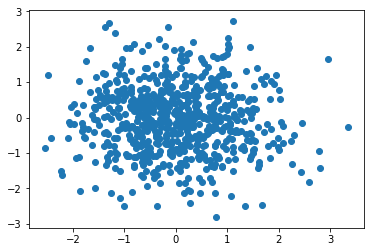

In [73]:
plt.scatter(data['Test4'],data['Test3'])

In [12]:
pd.plot.scatter(data['Test4'],data['Test3'])

AttributeError: module 'pandas' has no attribute 'plot'

In [79]:
data = pd.read_csv('../data/TestPandas.csv')

In [94]:
example = data.at[32,'file']

In [100]:
def get_audio(file, normalize=False):
    _, signal = wavfile.read('../data/audio/' + file + '.wav', mmap=False)
    if normalize:
        signal = signal / np.max(np.abs(signal))
    return signal

def get_sample_rate(file, normalize=False):
    sr, _ = wavfile.read('../data/audio/' + file + '.wav', mmap=False)
    return sr

def play_audio(file, normalize=False):
    sr, signal = wavfile.read('../data/audio/' + file + '.wav', mmap=False)
    
    if normalize:
        signal = signal / np.max(np.abs(signal))    
        
    return ipd.Audio(signal, rate=sr)